In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("datasets/heartdisease.csv")

In [4]:
df['Ca']=df['Ca'].fillna(df['Ca'].mean())
df['Thal']=df['Thal'].fillna(df['Thal'].mode()[0])

In [5]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

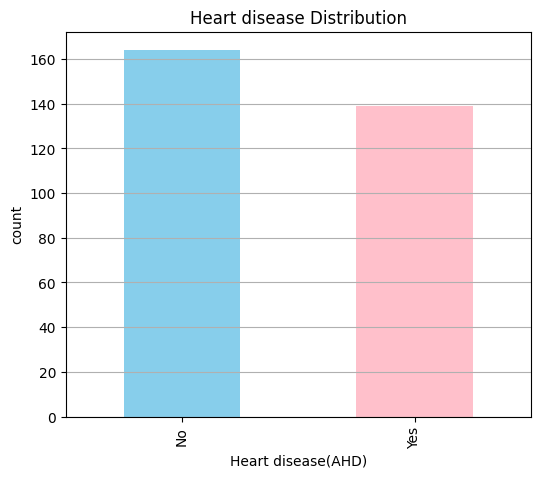

In [6]:
#barplot
plt.figure(figsize=(6,5))
df['AHD'].value_counts().plot(kind='bar',color=['skyblue','pink'])
plt.title("Heart disease Distribution")
plt.xlabel("Heart disease(AHD)")
plt.ylabel("count")
plt.grid(axis='y')     #horixontal line to y axis
plt.show()

In [7]:
#histogram age distribution

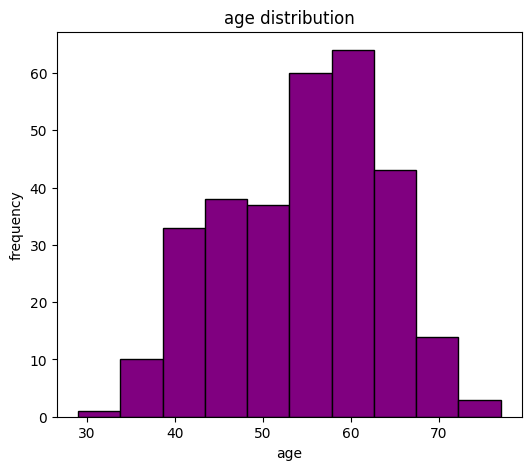

In [8]:
plt.figure(figsize=(6,5))
plt.hist(df['Age'],bins=10,color='purple',edgecolor='black')
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

In [9]:
#scatter plot maxHR vs age coloured by AHD

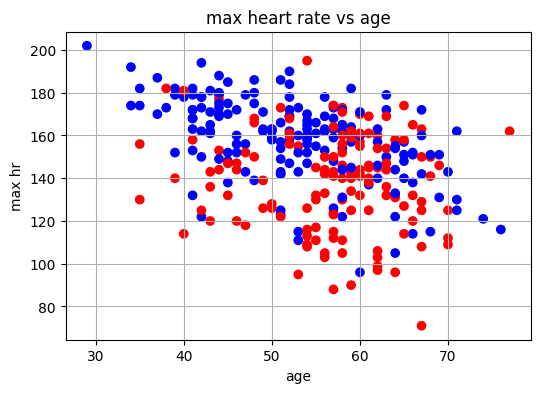

In [10]:
plt.figure(figsize=(6,4))
colors=df['AHD'].map({'Yes' : 'red','No' :'blue'})
plt.scatter(df['Age'],df['MaxHR'],c=colors)
plt.title("max heart rate vs age")
plt.xlabel("age")
plt.ylabel("max hr")
plt.grid(True)
plt.show()

In [11]:
# 5. Stacked Bar: ChestPain type vs AHD


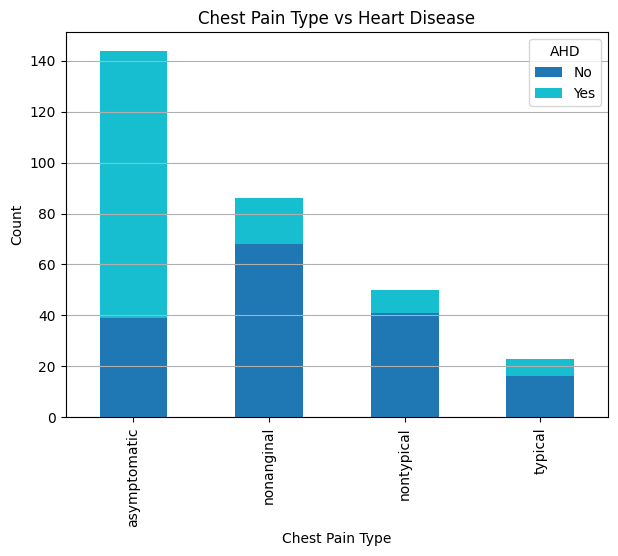

In [12]:
chest_ahd=pd.crosstab(df['ChestPain'],df['AHD'])
chest_ahd.plot(kind='bar',stacked=True,colormap='tab10',figsize=(7,5))
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [13]:
#boxplot colesterol level by ahd

In [14]:
#kind='bar' → bar chart.

#stacked=True → each bar is stacked (for each ChestPain type, you'll see a section for "Yes" and "No").

#colormap='Set2' → uses a nice color palette.

#figsize=(7, 5) → sets the figure size in inches

<Figure size 600x700 with 0 Axes>

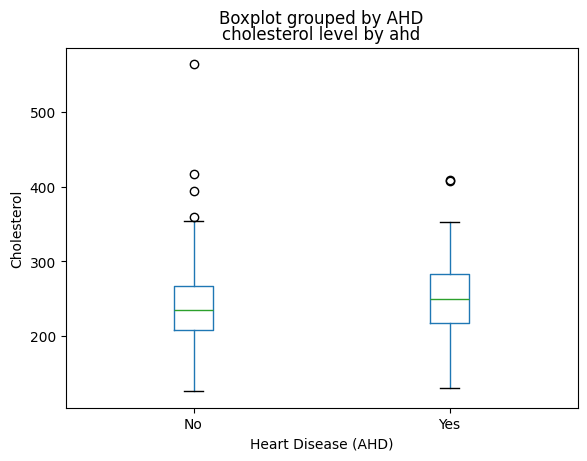

In [15]:
plt.figure(figsize=(6,7))
df.boxplot(column='Chol',by='AHD',grid=False)
plt.title("cholesterol level by ahd")
plt.xlabel('Heart Disease (AHD)')
plt.ylabel('Cholesterol')
plt.show()

In [16]:
import seaborn as sns

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6328\1134060025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='AHD',palette='Set2')


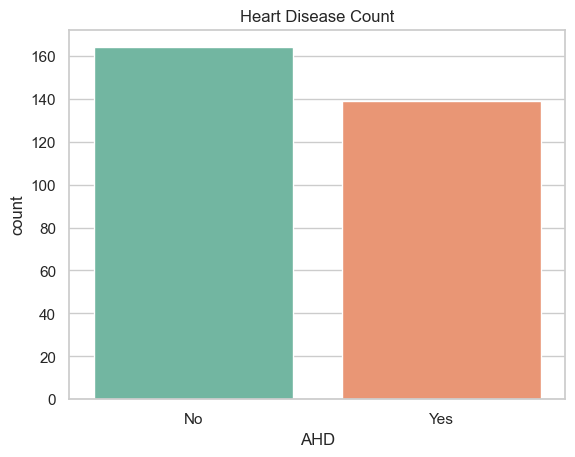

In [18]:
sns.set(style='whitegrid')
sns.countplot(data=df,x='AHD',palette='Set2')
plt.title("Heart Disease Count")
plt.show()

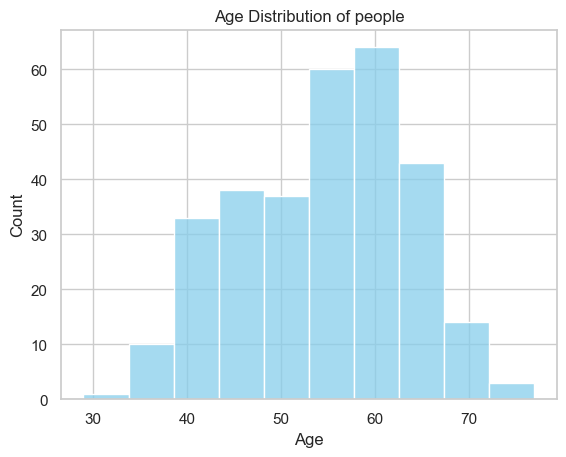

In [22]:
sns.histplot(data=df,x='Age',bins=10,color='skyblue')
plt.title('Age Distribution of people')
plt.show()

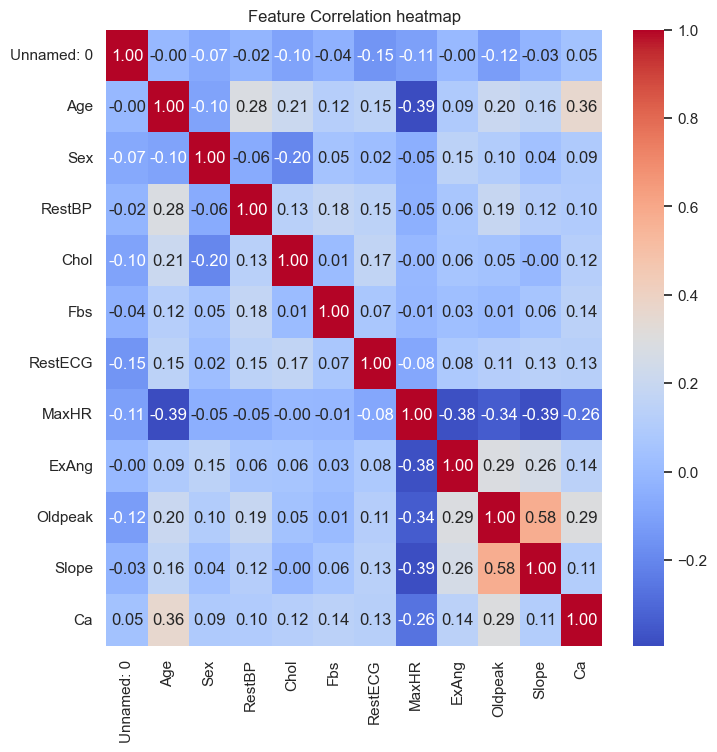

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature Correlation heatmap')
plt.show()

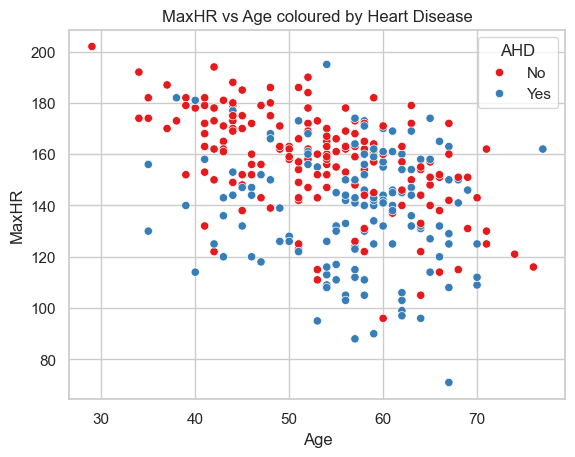

In [28]:
sns.scatterplot(data=df,x='Age',y='MaxHR',hue='AHD',palette='Set1')
plt.title("MaxHR vs Age coloured by Heart Disease")
plt.show()
#In Seaborn, the hue parameter is used to add a third categorical variable to plots, which is mapped to color. 
#It helps visually differentiate groups within the data using color coding.

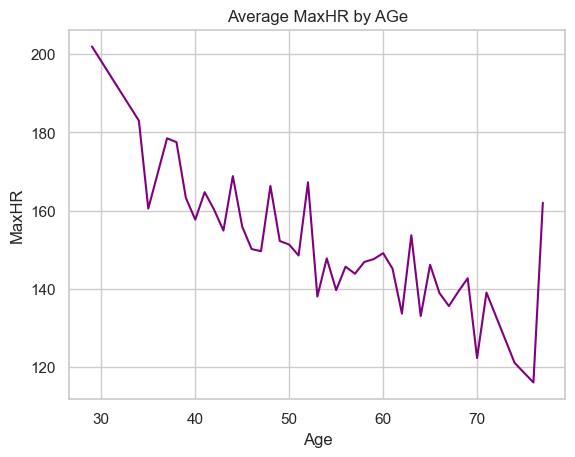

In [29]:
avg_hr_by_age=df.groupby('Age')['MaxHR'].mean().reset_index()
sns.lineplot(data=avg_hr_by_age,x='Age',y='MaxHR',color='purple')
plt.title('Average MaxHR by AGe')
plt.show()